# Imports

In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Various Data Loads

In [ ]:
tips = sns.load_dataset("tips")
X = tips.drop(columns=["tip"])
y = tips["tip"]
display(X)
display(y)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).join(
    pd.Series(iris["target"], name="species")
)

df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df

In [ ]:
df = pd.read_csv("./data/housing.csv")
df

# 18.1 NLP Introduction

Comparing to NLP to numerically driven ML

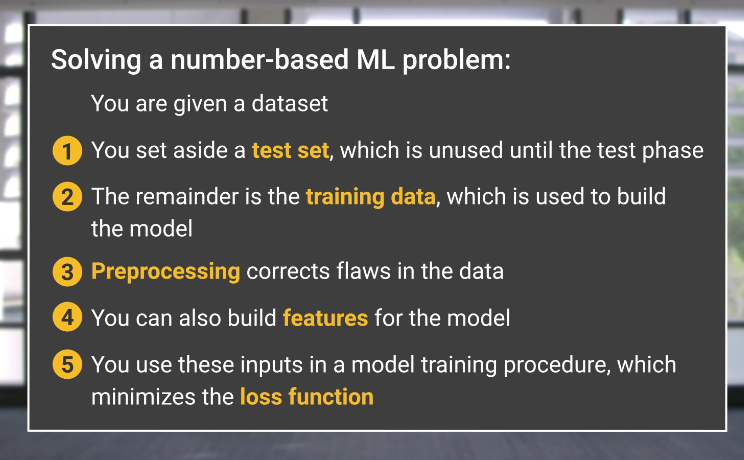

ML Workflow

## 



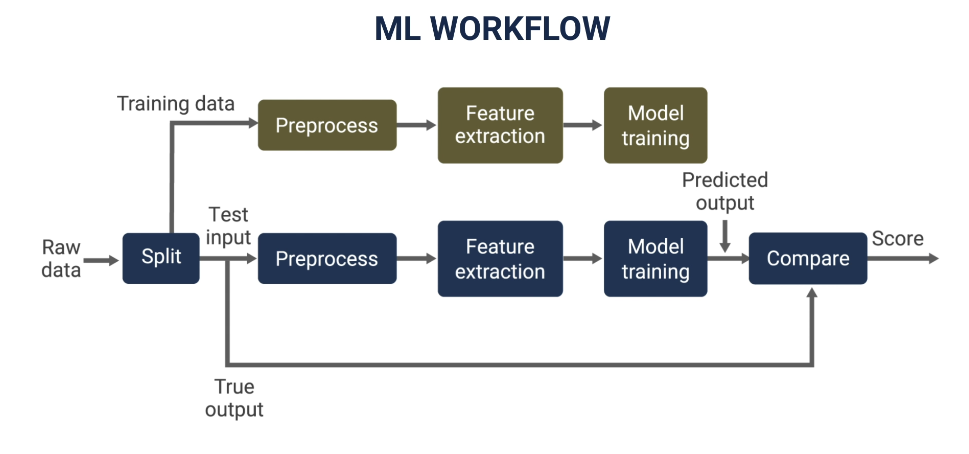

ML Workflow for NLP

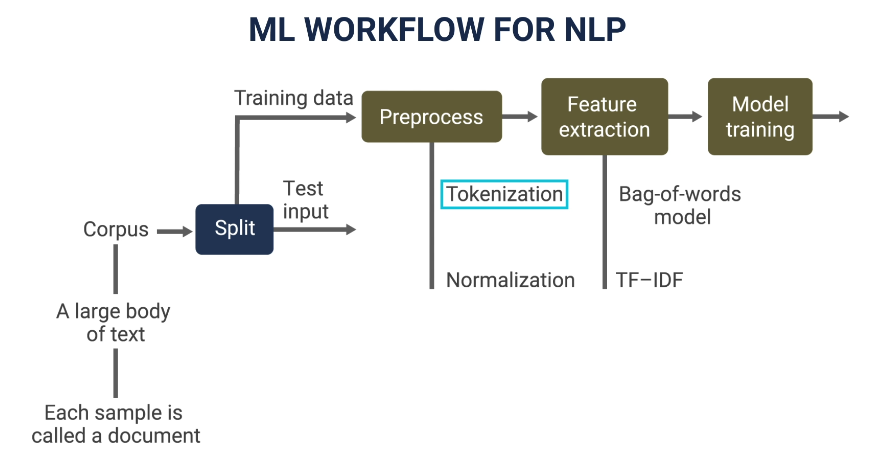

Pre-processing:
- Tokenization is splitting the text into separate grammatical units "tokens"
- Normalization reduces the tokens to core set that captures the important information in the document

Most popular python library for this type of processing is NLTK - natural language toolkit